In [1]:
#A1
import math
from collections import Counter

# Given dataset for 'buys_computer' column (target)
buys_computer = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
                 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

# Given datasets for 'age', 'income', 'student', and 'credit_rating' attributes
age_data = ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40',
            '<=30', '>40', '<=30', '31...40', '31...40', '>40']
income_data = ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'low', 'medium', 'medium',
               'medium', 'high', 'medium', 'medium', 'high', 'medium']
student_data = ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes',
                'yes', 'yes', 'yes', 'no', 'no', 'no']
credit_rating_data = ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent',
                      'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent',
                      'excellent', 'fair', 'excellent']

# Function to calculate entropy
def entropy(labels):
    total_count = len(labels)
    label_counts = Counter(labels)
    entropy_val = 0
    for count in label_counts.values():
        prob = count / total_count
        entropy_val -= prob * math.log2(prob)
    return entropy_val

# Function to calculate entropy for a feature
def feature_entropy(data, labels):
    total_count = len(labels)
    feature_counts = Counter([item[0] for item in data])

    feature_entropy_val = 0
    for feature_val, count in feature_counts.items():
        subset = [labels[i] for i, item in enumerate(data) if item[0] == feature_val]
        subset_entropy = entropy(subset)
        feature_entropy_val += (count / total_count) * subset_entropy
    return feature_entropy_val

# Combine each feature with the 'buys_computer' column for calculation
data_age_buys_computer = list(zip(age_data, buys_computer))
data_income_buys_computer = list(zip(income_data, buys_computer))
data_student_buys_computer = list(zip(student_data, buys_computer))
data_credit_buys_computer = list(zip(credit_rating_data, buys_computer))

# Calculate entropy of the target ('buys_computer')
target_entropy = entropy(buys_computer)

# Calculate entropy and information gain for 'age'
age_entropy = feature_entropy(data_age_buys_computer, buys_computer)
info_gain_age = target_entropy - age_entropy

# Calculate entropy and information gain for 'income'
income_entropy = feature_entropy(data_income_buys_computer, buys_computer)
info_gain_income = target_entropy - income_entropy

# Calculate entropy and information gain for 'student'
student_entropy = feature_entropy(data_student_buys_computer, buys_computer)
info_gain_student = target_entropy - student_entropy

# Calculate entropy and information gain for 'credit_rating'
credit_entropy = feature_entropy(data_credit_buys_computer, buys_computer)
info_gain_credit = target_entropy - credit_entropy

# Output the results
print(f"Entropy of target (buys_computer): {target_entropy}")
print(f"Information Gain for 'age': {info_gain_age}")
print(f"Information Gain for 'income': {info_gain_income}")
print(f"Information Gain for 'student': {info_gain_student}")
print(f"Information Gain for 'credit_rating': {info_gain_credit}")

# Determine the attribute with the highest information gain
info_gains = {
    "age": info_gain_age,
    "income": info_gain_income,
    "student": info_gain_student,
    "credit_rating": info_gain_credit
}

best_feature = max(info_gains, key=info_gains.get)
print(f"Best feature to split on: {best_feature}")


Entropy of target (buys_computer): 0.8960382325345574
Information Gain for 'age': 0.17667729476412386
Information Gain for 'income': 0.08375933113770517
Information Gain for 'student': 0.07970110824578913
Information Gain for 'credit_rating': 0.12425601093475913
Best feature to split on: age


Training Set Accuracy: 1.0
Depth of the Tree: 4


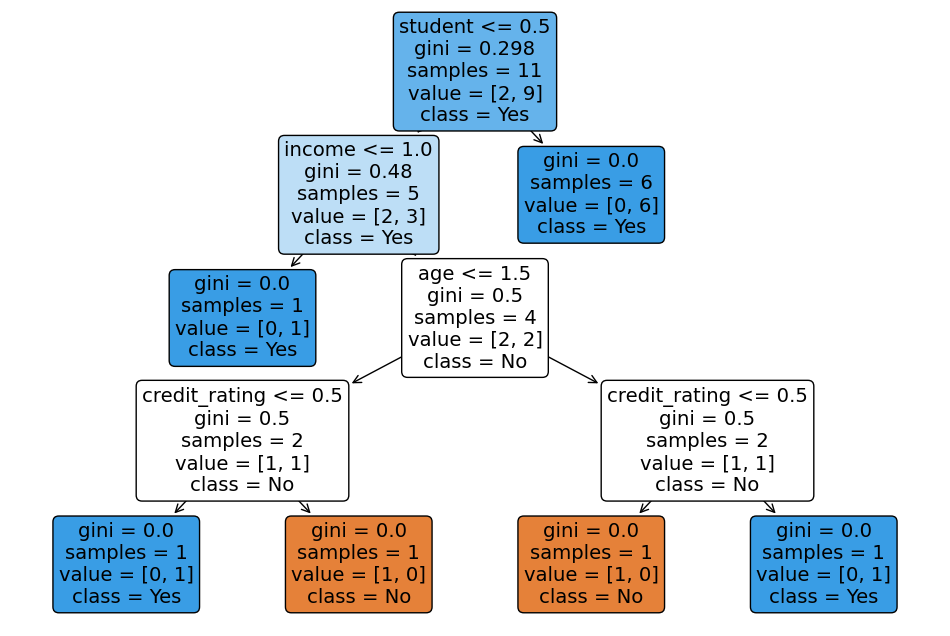

In [2]:
#A2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Manually input the data from the image
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Encode the categorical variables
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Split the dataset into features (X) and target (y)
X = df.drop('buys_computer', axis=1)  # Feature set
y = df['buys_computer']  # Target labels

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the model with the training data
model.fit(Tr_X, Tr_y)

# Evaluate the model on the training set
train_accuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy: {train_accuracy}")

# Get the depth of the constructed decision tree
tree_depth = model.get_depth()
print(f"Depth of the Tree: {tree_depth}")

# Visualize the constructed tree
plt.figure(figsize=(12, 8))  # Set the size of the figure
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()


Depth of the Tree: 4


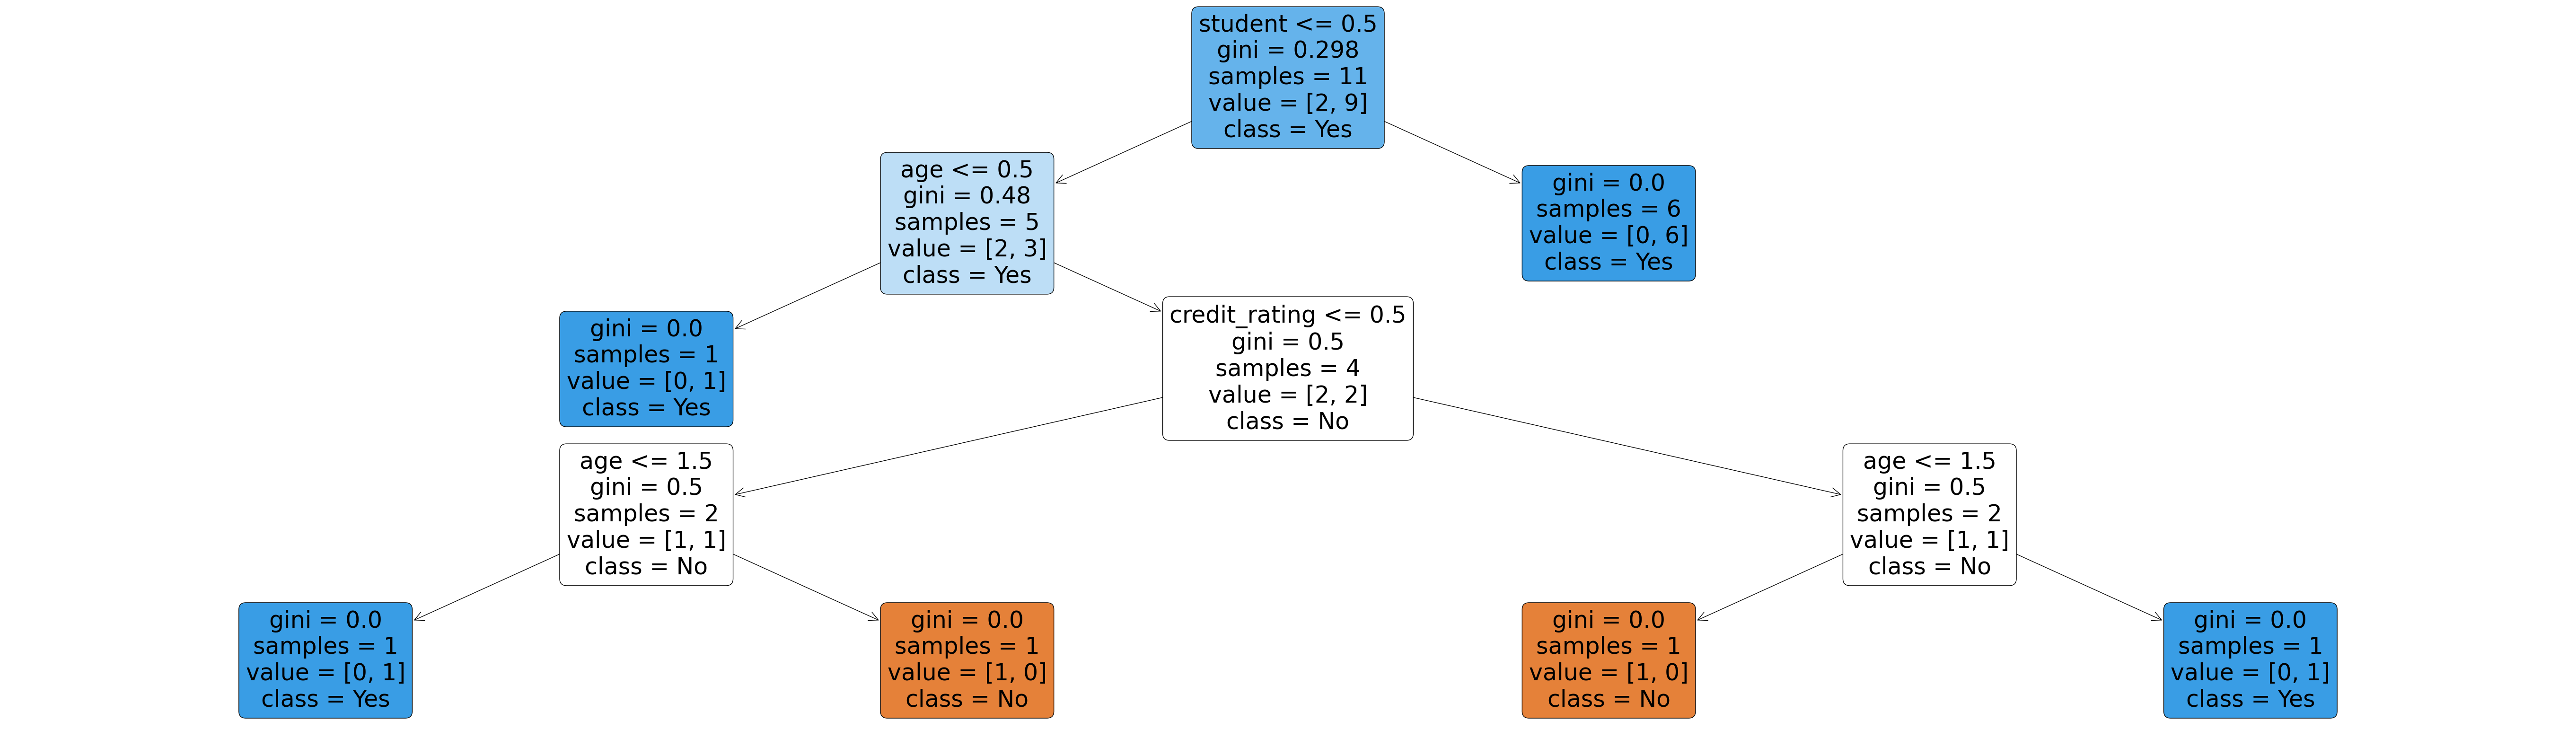

In [3]:
#A3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Manually input the data from the image
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Encode the categorical variables into numerical format
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Split the dataset into features (X) and target (y)
X = df.drop('buys_computer', axis=1)  # Feature set
y = df['buys_computer']  # Target labels

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the model with the training data
model.fit(Tr_X, Tr_y)

# Get the depth of the constructed decision tree
tree_depth = model.get_depth()
print(f"Depth of the Tree: {tree_depth}")

# Visualize the constructed tree
plt.figure(figsize=(70, 20))  # Set the size of the figure
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()


In [ ]:
#A4
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Function to load images and labels from directories
def load_images_from_folder(base_folder, image_size=(64, 64)):
    X, y = [], []
    for category in ['glioma', 'meningioma', 'notumor', 'pituitary']:
        folder_path = os.path.join(base_folder, category)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path).convert('RGB').resize(image_size)  # Ensure RGB format
            img_array = np.array(img).flatten()  # Flatten image
            X.append(img_array)
            y.append(category)
    return np.array(X), np.array(y)

# Paths to the Training and Testing folders
training_folder = r'C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted\Training'
testing_folder = r'C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted\Testing'

# Load training and testing data
X_train, y_train = load_images_from_folder(training_folder)
X_test, y_test = load_images_from_folder(testing_folder)

# Encode the labels into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train_encoded)

# Evaluate accuracy on training and testing sets
train_accuracy = model.score(X_train, y_train_encoded)
test_accuracy = model.score(X_test, y_test_encoded)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=None, class_names=label_encoder.classes_, rounded=True)
plt.show()


In [ ]:
#A5
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Function to load images and labels from directories
def load_images_from_folder(base_folder, image_size=(64, 64)):
    X, y = [], []
    for category in ['glioma', 'meningioma', 'notumor', 'pituitary']:
        folder_path = os.path.join(base_folder, category)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path).convert('RGB').resize(image_size)  # Ensure RGB format and resize
            img_array = np.array(img)  # Convert to array
            if img_array.shape == (image_size[0], image_size[1], 3):  # Check if the shape is as expected
                X.append(img_array.flatten())  # Flatten and append the image
                y.append(category)
    return np.array(X), np.array(y)

# Paths to the Training and Testing folders
training_folder = r'C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted\Training'
testing_folder = r'C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted\Testing'

# Load training and testing data
X_train, y_train = load_images_from_folder(training_folder)
X_test, y_test = load_images_from_folder(testing_folder)

# Encode the labels into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Decision Tree with max_depth constraint (e.g., max_depth=5)
model_max_depth = DecisionTreeClassifier(max_depth=5)
model_max_depth.fit(X_train, y_train_encoded)

# Evaluate accuracy with max_depth constraint
train_accuracy_max_depth = model_max_depth.score(X_train, y_train_encoded)
test_accuracy_max_depth = model_max_depth.score(X_test, y_test_encoded)

print(f"Training Accuracy (max_depth=5): {train_accuracy_max_depth}")
print(f"Testing Accuracy (max_depth=5): {test_accuracy_max_depth}")

# Plot the Decision Tree with max_depth
plt.figure(figsize=(20, 10))
plot_tree(model_max_depth, filled=True, feature_names=None, class_names=label_encoder.classes_, rounded=True)
plt.title('Decision Tree with max_depth=5')
plt.show()


In [ ]:
#A6
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Function to load images and labels from directories
def load_images_from_folder(base_folder, image_size=(64, 64)):
    X, y = [], []
    for category in ['glioma', 'meningioma', 'notumor', 'pituitary']:
        folder_path = os.path.join(base_folder, category)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path).convert('RGB').resize(image_size)  # Convert to RGB and resize
            img_array = np.array(img)  # Convert to array
            
            # Ensure the image is a 2D array (for RGB it will be 3D, so flatten it)
            if img_array.shape == (image_size[0], image_size[1], 3):  
                X.append(img_array.flatten())  # Flatten the image and append to X
                y.append(category)
            else:
                print(f"Skipping {img_file}: unexpected shape {img_array.shape}")  # Optional: log skipped images

    return np.array(X), np.array(y)

# Paths to the Training and Testing folders
training_folder = r'C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted\Training'
testing_folder = r'C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted\Testing'

# Load training and testing data
X_train, y_train = load_images_from_folder(training_folder)
X_test, y_test = load_images_from_folder(testing_folder)

# Encode the labels into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Decision Tree with max_depth and default Gini criterion
model_gini = DecisionTreeClassifier(max_depth=5)
model_gini.fit(X_train, y_train_encoded)

# Evaluate accuracy with default Gini criterion
train_accuracy_gini = model_gini.score(X_train, y_train_encoded)
test_accuracy_gini = model_gini.score(X_test, y_test_encoded)

print(f"Training Accuracy (Gini, max_depth=5): {train_accuracy_gini}")
print(f"Testing Accuracy (Gini, max_depth=5): {test_accuracy_gini}")

# Plot the Decision Tree with Gini criterion
plt.figure(figsize=(20, 10))
plot_tree(model_gini, filled=True, feature_names=None, class_names=label_encoder.classes_, rounded=True)
plt.title('Decision Tree with Gini Criterion (default) and max_depth=5')
plt.show()

# Decision Tree with Entropy criterion
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model_entropy.fit(X_train, y_train_encoded)

# Evaluate accuracy with Entropy criterion
train_accuracy_entropy = model_entropy.score(X_train, y_train_encoded)
test_accuracy_entropy = model_entropy.score(X_test, y_test_encoded)

print(f"Training Accuracy (Entropy, max_depth=5): {train_accuracy_entropy}")
print(f"Testing Accuracy (Entropy, max_depth=5): {test_accuracy_entropy}")

# Plot the Decision Tree with Entropy criterion
plt.figure(figsize=(20, 10))
plot_tree(model_entropy, filled=True, feature_names=None, class_names=label_encoder.classes_, rounded=True)
plt.title('Decision Tree with Entropy Criterion and max_depth=5')
plt.show()

# Comparison of Gini and Entropy criterion
print("\n--- Comparison ---")
print(f"Gini Criterion Training Accuracy (max_depth=5): {train_accuracy_gini}")
print(f"Gini Criterion Testing Accuracy (max_depth=5): {test_accuracy_gini}")
print(f"Entropy Criterion Training Accuracy (max_depth=5): {train_accuracy_entropy}")
print(f"Entropy Criterion Testing Accuracy (max_depth=5): {test_accuracy_entropy}")


In [ ]:
#A7
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Function to load images and labels from directories
def load_images_from_folder(base_folder, image_size=(64, 64)):
    X, y = [], []
    for category in ['glioma', 'meningioma', 'notumor', 'pituitary']:
        folder_path = os.path.join(base_folder, category)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path).convert('RGB').resize(image_size)  # Ensure images are RGB
            img_array = np.array(img).flatten()  # Flatten image
            X.append(img_array)
            y.append(category)
    return np.array(X), np.array(y)

# Paths to the Training and Testing folders
training_folder = r'C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted\Training'
testing_folder = r'C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted\Testing'

# Load training and testing data
X_train, y_train = load_images_from_folder(training_folder)  # Corrected variable name
X_test, y_test = load_images_from_folder(testing_folder)      # Corrected variable name

# Encode the labels into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define hyper-parameter grid for tuning
tree_para = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10]
}

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV for hyper-parameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=tree_para, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Output the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test_encoded)

print(f"Test Accuracy of the Best Model: {test_accuracy}")

# Plot the best Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=None, class_names=label_encoder.classes_, rounded=True)
plt.title('Best Decision Tree after Hyper-parameter Tuning')
plt.show()
